# Import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder


# Load Data

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Find Missing Value

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
train_data.drop(['Cabin'], axis=1, inplace=True)
test_data.drop(['Cabin'], axis=1, inplace=True)

# Features

<AxesSubplot:>

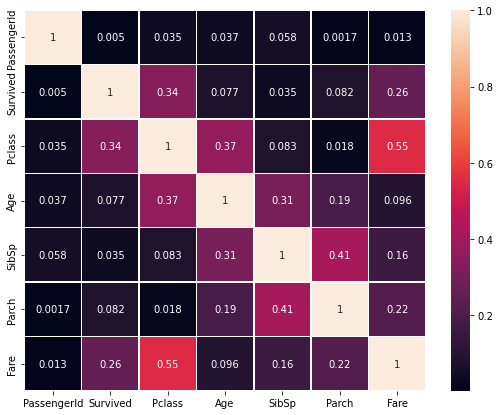

In [10]:
fig, ax = plt.subplots(figsize=(9,7))         # Sample figsize in inches
sns.heatmap(train_data.corr().abs(), annot= True, linewidths=.5, ax = ax)

C:\Users\Administration\anaconda3\envs\Lab_2021\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


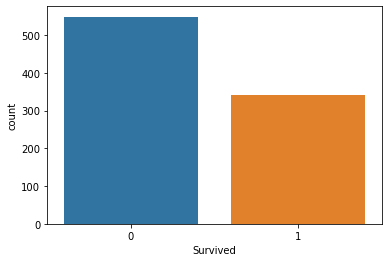

In [11]:
# number of survived people
sns.countplot(train_data.Survived)
plt.show()

C:\Users\Administration\anaconda3\envs\Lab_2021\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


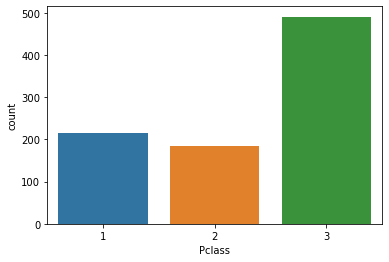

In [12]:
#Pclass
sns.countplot(train_data.Pclass)
plt.show()

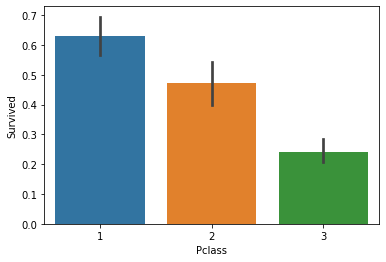

In [13]:
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.show()

C:\Users\Administration\anaconda3\envs\Lab_2021\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


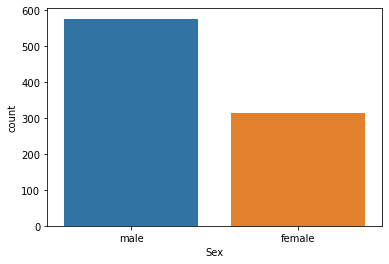

In [14]:
#Sex
sns.countplot(train_data.Sex)
plt.show()

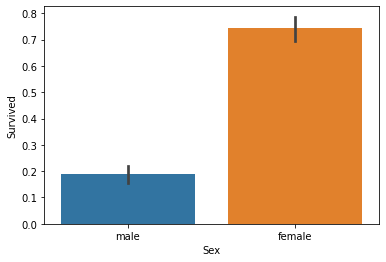

In [15]:
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.show()

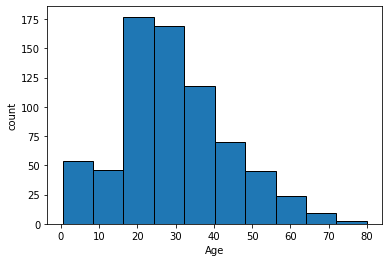

In [16]:
plt.hist(train_data.Age, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

C:\Users\Administration\anaconda3\envs\Lab_2021\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Administration\anaconda3\envs\Lab_2021\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Administration\anaconda3\envs\Lab_2021\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figur

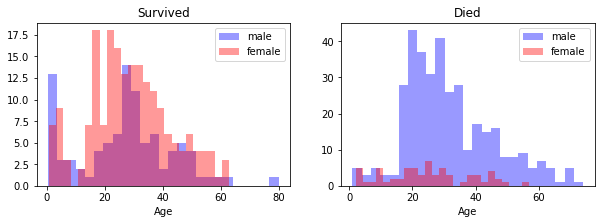

In [17]:
#比較男女年齡差異是否影響生存率 Age
male = 'male'
female = 'female'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 3))
women = train_data[train_data['Sex']==female]
men = train_data[train_data['Sex']== male]
ax = sns.distplot(men[men['Survived']==1].Age, bins=25, label = male, ax = axes[0], kde =False, color="blue")
ax = sns.distplot(women[women['Survived']==1].Age,bins=25, label = female, ax = axes[0], kde =False, color="red")
ax.legend() #顯示圖例
ax.set_title('Survived')
ax = sns.distplot(men[men['Survived']==0].Age, bins=25, label = male, ax = axes[1], kde = False, color="blue")
ax = sns.distplot(women[women['Survived']==0].Age, bins=25, label = female, ax = axes[1], kde = False, color="red")
ax.legend() #顯示圖例
ax.set_title('Died');

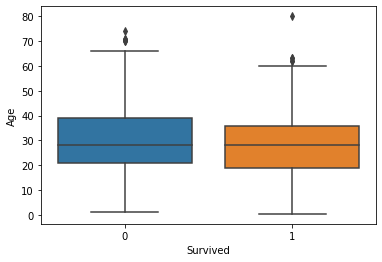

In [18]:
sns.boxplot(x='Survived', y='Age', data=train_data)
plt.show()

C:\Users\Administration\anaconda3\envs\Lab_2021\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


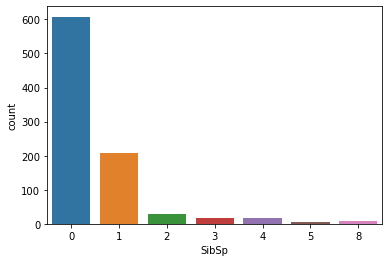

In [19]:
#Sibsp
sns.countplot(train_data.SibSp)
plt.show()

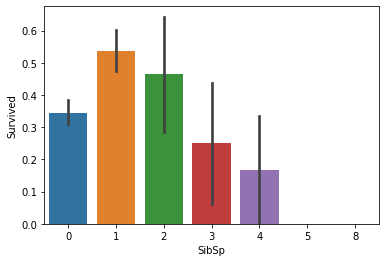

In [20]:
sns.barplot(x='SibSp', y='Survived', data=train_data)
plt.show()

C:\Users\Administration\anaconda3\envs\Lab_2021\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


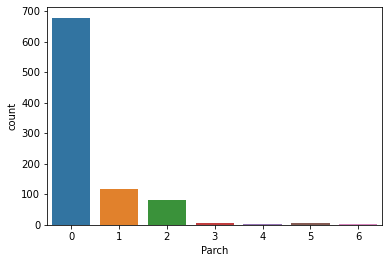

In [21]:
#Parch
sns.countplot(train_data.Parch)
plt.show()

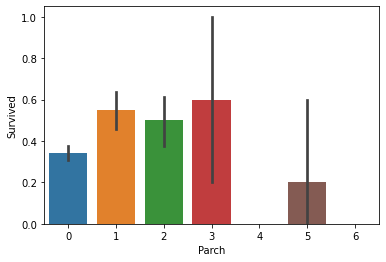

In [22]:
sns.barplot(x='Parch', y='Survived', data=train_data)
plt.show()

In [23]:
#Ticket
train_data.Ticket.head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

C:\Users\Administration\anaconda3\envs\Lab_2021\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


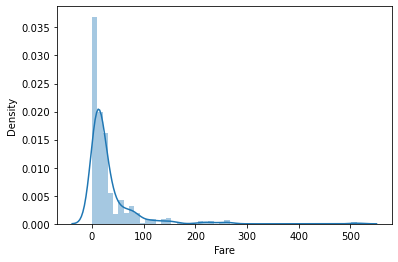

In [24]:
#Fare
sns.distplot(train_data.Fare)
plt.show()

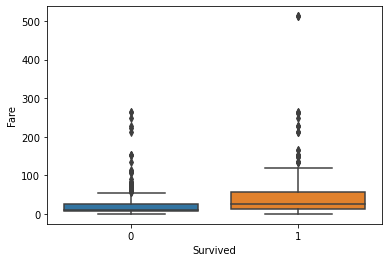

In [25]:
sns.boxplot(x='Survived', y='Fare', data=train_data)
plt.show()

C:\Users\Administration\anaconda3\envs\Lab_2021\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


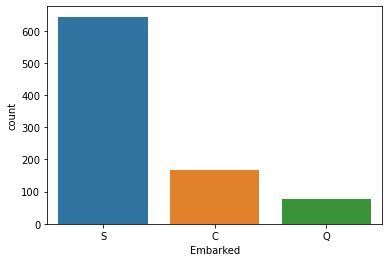

In [26]:
#Embarked
sns.countplot(train_data.Embarked)
plt.show()

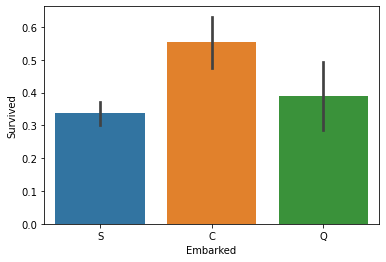

In [27]:
sns.barplot(x='Embarked', y='Survived', data=train_data)
plt.show()

In [28]:
train_data.Name.head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [29]:
whole_data = train_data.append(test_data)
whole_data['Title'] = whole_data.Name.str.extract(r'([A-Za-z]+)\.', expand=False) #正規表達式
whole_data.Title.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Jonkheer      1
Don           1
Capt          1
Lady          1
Countess      1
Mme           1
Dona          1
Sir           1
Name: Title, dtype: int64

In [30]:
Common_Title = ['Mr', 'Miss', 'Mrs', 'Master']
whole_data['Title'].replace(['Ms', 'Mlle', 'Mme'], 'Miss', inplace=True)
whole_data['Title'].replace(['Lady'], 'Mrs', inplace=True)
whole_data['Title'].replace(['Sir', 'Rev'], 'Mr', inplace=True)
whole_data['Title'][~whole_data.Title.isin(Common_Title)] = 'Others'

C:\Users\Administration\anaconda3\envs\Lab_2021\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


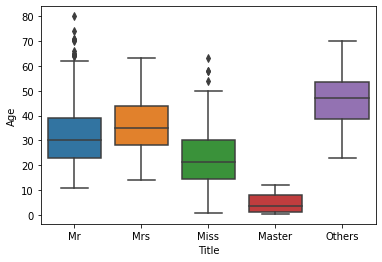

In [31]:
train_data = whole_data[:len(train_data)]
test_data = whole_data[len(train_data):]
sns.boxplot(x='Title', y='Age', data=train_data)
plt.show()

In [32]:
AgeMedian_by_titles = train_data.groupby('Title')['Age'].median()
AgeMedian_by_titles

Title
Master     3.5
Miss      21.5
Mr        30.0
Mrs       35.0
Others    47.0
Name: Age, dtype: float64

In [33]:
for title in AgeMedian_by_titles.index:
    train_data['Age'][(train_data.Age.isnull()) & (train_data.Title == title)] = AgeMedian_by_titles[title]
    test_data['Age'][(test_data.Age.isnull()) & (test_data.Title == title)] = AgeMedian_by_titles[title]

C:\Users\Administration\anaconda3\envs\Lab_2021\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Administration\anaconda3\envs\Lab_2021\lib\site-packages\pandas\core\series.py:963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
C:\Users\Administration\anaconda3\envs\Lab_2021\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [34]:
train_data['Embarked'].fillna(train_data.Embarked.mode()[0], inplace=True)

C:\Users\Administration\anaconda3\envs\Lab_2021\lib\site-packages\pandas\core\series.py:4439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [35]:
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

C:\Users\Administration\anaconda3\envs\Lab_2021\lib\site-packages\pandas\core\series.py:4439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [36]:
train_data.Fare.sort_values(ascending=False).head(5) #Fare有三個outlier

258    512.3292
737    512.3292
679    512.3292
88     263.0000
27     263.0000
Name: Fare, dtype: float64

In [37]:
train_data.loc[train_data.Fare>512, 'Fare'] = 263
train_data.Fare.sort_values(ascending=False).head(5)

C:\Users\Administration\anaconda3\envs\Lab_2021\lib\site-packages\pandas\core\indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


258    263.0
88     263.0
27     263.0
341    263.0
737    263.0
Name: Fare, dtype: float64

In [38]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Title        891 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [39]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     0 non-null      float64
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
 11  Title        418 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 42.5+ KB


# Data Transformation

In [40]:
train_data['Sex_Code'] = train_data['Sex'].map({'female':1, 'male':0}).astype('int')
test_data['Sex_Code'] = test_data['Sex'].map({'female':1, 'male':0}).astype('int')

C:\Users\Administration\anaconda3\envs\Lab_2021\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Administration\anaconda3\envs\Lab_2021\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
train_data['Embarked_Code'] = train_data['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype('int')
test_data['Embarked_Code'] = test_data['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype('int')

C:\Users\Administration\anaconda3\envs\Lab_2021\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Administration\anaconda3\envs\Lab_2021\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


C:\Users\Administration\anaconda3\envs\Lab_2021\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Administration\anaconda3\envs\Lab_2021\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


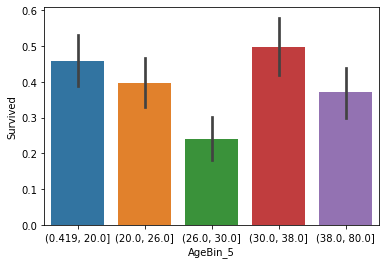

In [42]:
train_data['AgeBin_5'] = pd.qcut(train_data['Age'], 5)
test_data['AgeBin_5'] = pd.qcut(test_data['Age'], 5)
sns.barplot(x='AgeBin_5', y='Survived', data=train_data)
plt.show()

C:\Users\Administration\anaconda3\envs\Lab_2021\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Administration\anaconda3\envs\Lab_2021\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


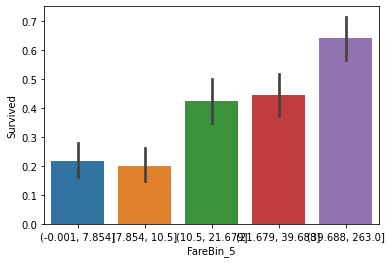

In [43]:
train_data['FareBin_5'] = pd.qcut(train_data['Fare'], 5)
test_data['FareBin_5'] = pd.qcut(test_data['Fare'], 5)

sns.barplot(x='FareBin_5', y='Survived', data=train_data)
plt.show()

In [44]:
label = LabelEncoder()
train_data['AgeBin_Code_5'] = label.fit_transform(train_data['AgeBin_5'])
test_data['AgeBin_Code_5'] = label.fit_transform(test_data['AgeBin_5'])

label = LabelEncoder()
train_data['FareBin_Code_5'] = label.fit_transform(train_data['FareBin_5'])
test_data['FareBin_Code_5'] = label.fit_transform(test_data['FareBin_5'])

C:\Users\Administration\anaconda3\envs\Lab_2021\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Administration\anaconda3\envs\Lab_2021\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Administration\anaconda3\envs\Lab_2021\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

# Create Feature

C:\Users\Administration\anaconda3\envs\Lab_2021\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Administration\anaconda3\envs\Lab_2021\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Administration\anaconda3\envs\Lab_2021\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only vali

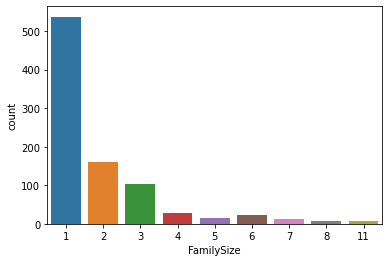

In [45]:
train_data['FamilySize'] = train_data.SibSp + train_data.Parch + 1
test_data['FamilySize'] = test_data.SibSp + test_data.Parch + 1
sns.countplot(train_data.FamilySize)
plt.show()

C:\Users\Administration\anaconda3\envs\Lab_2021\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Administration\anaconda3\envs\Lab_2021\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Administration\anaconda3\envs\Lab_2021\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only vali

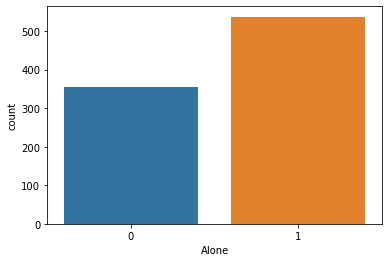

In [46]:
train_data['Alone'] = train_data.FamilySize.map(lambda x: 1 if x == 1 else 0)
test_data['Alone'] = test_data.FamilySize.map(lambda x: 1 if x == 1 else 0)
sns.countplot(train_data.Alone)
plt.show()

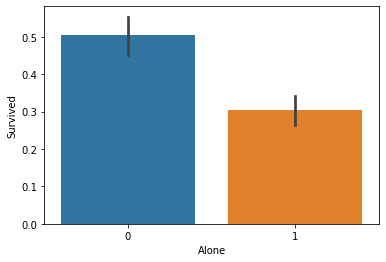

In [47]:
sns.barplot(x='Alone', y='Survived', data=train_data)
plt.show()

C:\Users\Administration\anaconda3\envs\Lab_2021\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


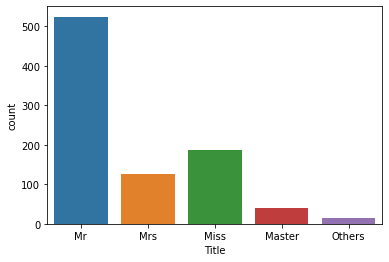

In [48]:
sns.countplot(train_data.Title)
plt.show()

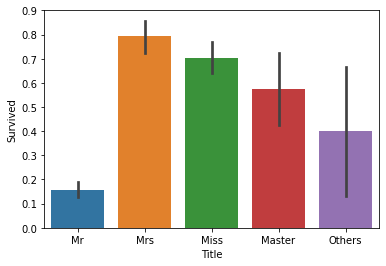

In [49]:
sns.barplot(x='Title', y='Survived', data=train_data)
plt.show()


In [50]:
train_data['Title_Code'] = train_data.Title.map({'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3,'Others':4}).astype('int')
test_data['Title_Code'] = test_data.Title.map({'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3,'Others':4}).astype('int')

C:\Users\Administration\anaconda3\envs\Lab_2021\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Administration\anaconda3\envs\Lab_2021\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [51]:
train_data[['Name', 'Ticket']].sort_values('Name').head(20)

,Name,Ticket
845,"Abbing, Mr. Anthony",C.A. 5547
746,"Abbott, Mr. Rossmore Edward",C.A. 2673
279,"Abbott, Mrs. Stanton (Rosa Hunt)",C.A. 2673
308,"Abelson, Mr. Samuel",P/PP 3381
874,"Abelson, Mrs. Samuel (Hannah Wizosky)",P/PP 3381
365,"Adahl, Mr. Mauritz Nils Martin",C 7076
401,"Adams, Mr. John",341826
40,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",7546
855,"Aks, Mrs. Sam (Leah Rosen)",392091
207,"Albimona, Mr. Nassef Cassem",2699


C:\Users\Administration\anaconda3\envs\Lab_2021\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


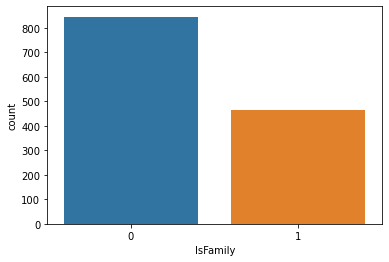

In [52]:
whole_data = train_data.append(test_data)
whole_data['Surname'] = whole_data.Name.str.extract(r'([A-Za-z]+),', expand=False)
whole_data['TixPref'] = whole_data.Ticket.str.extract(r'(.*\d)', expand=False)
whole_data['SurTix'] = whole_data['Surname'] + whole_data['TixPref']
whole_data['IsFamily'] = whole_data.SurTix.duplicated(keep=False)*1
sns.countplot(whole_data.IsFamily)
plt.show()

In [53]:
whole_data['Child'] = whole_data.Age.map(lambda x: 1 if x <=16 else 0)
FamilyWithChild = whole_data[(whole_data.IsFamily==1)&(whole_data.Child==1)]['SurTix'].unique()
len(FamilyWithChild)

66

In [54]:
whole_data['FamilyId'] = 0
x = 1
for tix in FamilyWithChild:
     whole_data.loc[whole_data.SurTix==tix, ['FamilyId']] = x
     x += 1

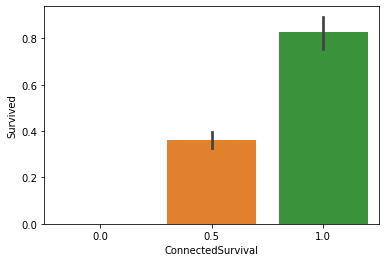

In [55]:
whole_data['ConnectedSurvival'] = 0.5 
Survived_by_FamilyId = whole_data.groupby('FamilyId').Survived.sum()
for i in range(1, len(FamilyWithChild)+1):
    if Survived_by_FamilyId[i] >= 1:
        whole_data.loc[whole_data.FamilyId==i, ['ConnectedSurvival']] = 1
    elif Survived_by_FamilyId[i] == 0:
            whole_data.loc[whole_data.FamilyId==i, ['ConnectedSurvival']] = 0
            train_data = whole_data[:len(train_data)]
            test_data = whole_data[len(train_data):]

sns.barplot(x='ConnectedSurvival', y='Survived', data=train_data)
plt.show()

In [56]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Title', 'Sex_Code',
       'Embarked_Code', 'AgeBin_5', 'FareBin_5', 'AgeBin_Code_5',
       'FareBin_Code_5', 'FamilySize', 'Alone', 'Title_Code', 'Surname',
       'TixPref', 'SurTix', 'IsFamily', 'Child', 'FamilyId',
       'ConnectedSurvival'],
      dtype='object')

<AxesSubplot:>

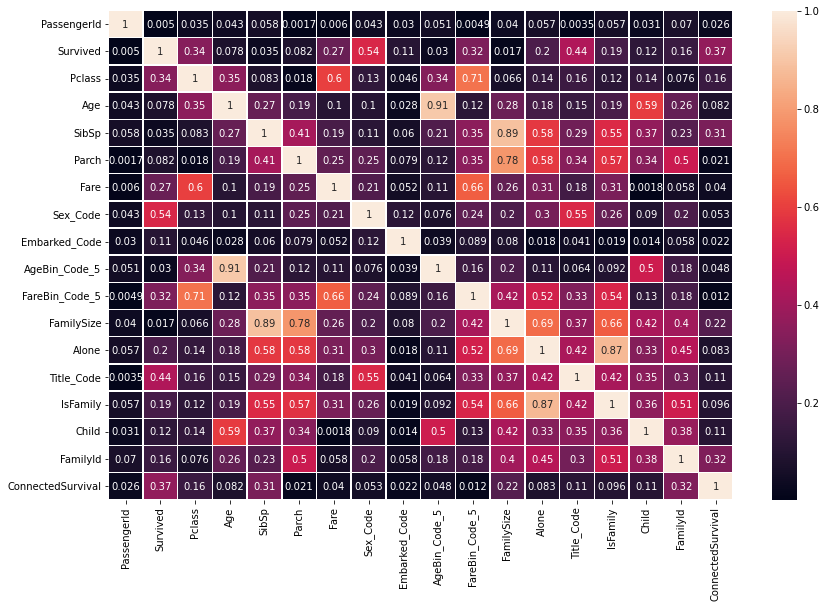

In [57]:
fig, ax = plt.subplots(figsize=(14,9))         # Sample figsize in inches
sns.heatmap(train_data.corr().abs(), annot= True, linewidths=.5, ax = ax)

In [58]:
x_train = train_data.drop(['Age', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Sex', 'SibSp', 'Survived', 
                           'Ticket', 'Title', 'AgeBin_5', 'FareBin_5', 'FamilySize', 'Surname', 'TixPref', 'SurTix', 'IsFamily',
                           'Child', 'FamilyId'], axis=1)

y_train = train_data['Survived']

In [59]:
model = RandomForestClassifier(n_estimators=200, random_state=2)

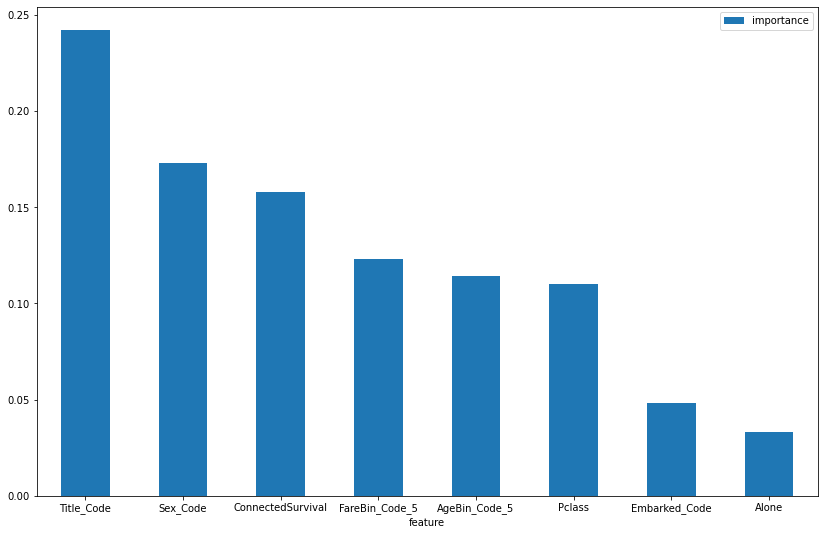

In [60]:
model.fit(x_train,y_train)

fig, ax = plt.subplots(figsize=(14,9)) 
importance = pd.DataFrame({'feature':x_train.columns, 'importance': np.round(model.feature_importances_,3)})
importance = importance.sort_values('importance', ascending=False).set_index('feature')
importance.plot(kind='bar', rot=0, ax = ax)
plt.show()

In [61]:
final = ['Title_Code', 'Sex_Code', 'ConnectedSurvival','FareBin_Code_5','AgeBin_Code_5', 'Pclass' ]

In [63]:
grid_param = {
 'n_estimators': [100, 200, 300],
 'criterion':['gini', 'entropy'],
 'min_samples_split': [2, 10, 20],
 'min_samples_leaf': [1, 5],
 'bootstrap': [True, False],
}
gd_sr = GridSearchCV(estimator=model,
 param_grid=grid_param,
 scoring='accuracy',
 cv=5,
 n_jobs=-1)
gd_sr.fit(x_train[final], y_train)
best_parameters = gd_sr.best_params_
print(best_parameters)

{'bootstrap': False, 'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [73]:
model = RandomForestClassifier(n_estimators=200, bootstrap=False, criterion= 'gini', min_samples_leaf=10, 
                               min_samples_split=2, random_state=2)

In [74]:
all_accuracies = cross_val_score(estimator=model, X=x_train, y=y_train, cv=5)
all_accuracies

array([0.87709497, 0.8258427 , 0.83707865, 0.80337079, 0.88764045])

In [75]:
all_accuracies.mean()

0.8462055112673404

In [77]:
x_test = test_data[final]
model.fit(x_train[final],y_train)
prediction = model.predict(x_test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': prediction.astype(int)})
output.to_csv('titanic.csv', index=False)